# Machine Learning - Assignment 2

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [22]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

In [35]:
# Variables containing specific types of features
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

print(f"Number of Word Frequency Features: {len(word_freq_features)}")
print(f"Number of Character Frequency Features: {len(char_freq_features)}")
print(f"Number of Capital Run Length Features: {len(capital_run_features)}\n")

print("Word Frequency Features:")
print(word_freq_features)
print("\nCharacter Frequency Features:")
print(char_freq_features)
print("\nCapital Run Length Features:")
print(capital_run_features)

Number of Word Frequency Features: 48
Number of Character Frequency Features: 6
Number of Capital Run Length Features: 3

Word Frequency Features:
['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
 'word_freq_our' 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_fre

In [37]:
# print(data)

# looks horrible, don't know why

# 1. Dataset Statistics

In [38]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [40]:
# Get the summary statistics for the y variable
summary_stats = scipy.stats.describe(y)

# Print the summary statistics in a readable format
print(f"Number of observations: {summary_stats.nobs}")
print(f"Minimum value: {summary_stats.minmax[0]}")
print(f"Maximum value: {summary_stats.minmax[1]}")
print(f"Mean: {summary_stats.mean}")
print(f"Variance: {summary_stats.variance}")
print(f"Skewness: {summary_stats.skewness}")
print(f"Kurtosis: {summary_stats.kurtosis}")

Number of observations: 3065
Minimum value: 0
Maximum value: 1
Mean: 0.39738988580750406
Variance: 0.23954932085067235
Skewness: 0.41936632478193103
Kurtosis: -1.824131885638896


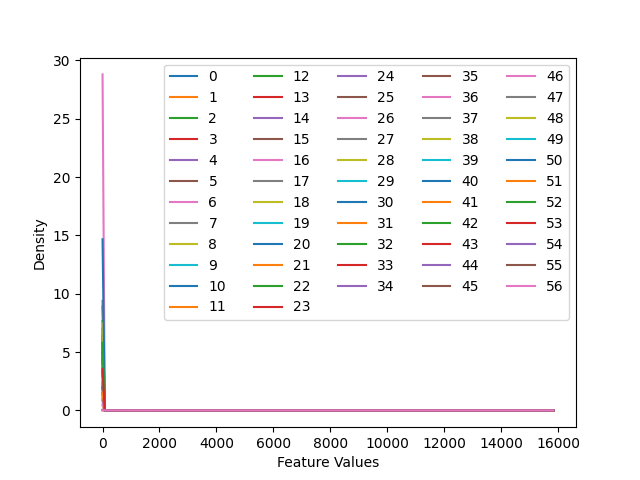

In [43]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)
plt.show()

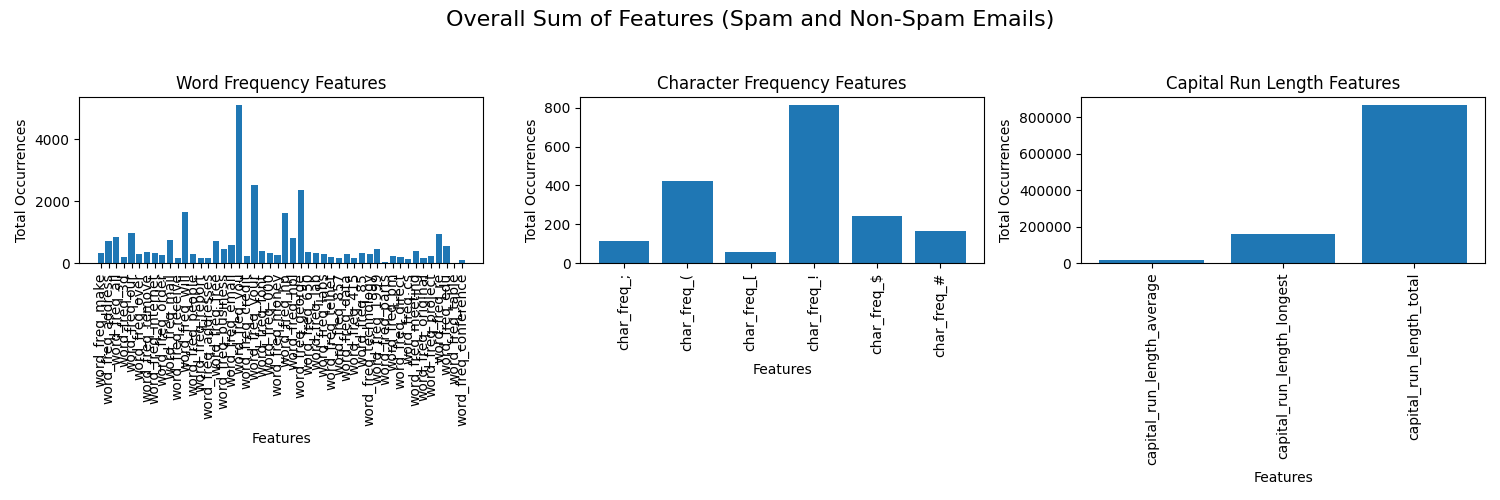

In [47]:
# Sum the occurrences for each feature
word_freq_sums = np.sum(X[:, word_freq_indices], axis=0)
char_freq_sums = np.sum(X[:, char_freq_indices], axis=0)
capital_run_sums = np.sum(X[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(15, 5))

# Word Frequency Features
plt.subplot(1, 3, 1)
plt.bar(word_freq_features, word_freq_sums)
plt.xticks(rotation=90)
plt.title('Word Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features
plt.subplot(1, 3, 2)
plt.bar(char_freq_features, char_freq_sums)
plt.xticks(rotation=90)
plt.title('Character Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features
plt.subplot(1, 3, 3)
plt.bar(capital_run_features, capital_run_sums)
plt.xticks(rotation=90)
plt.title('Capital Run Length Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Overall title
plt.suptitle('Overall Sum of Features (Spam and Non-Spam Emails)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


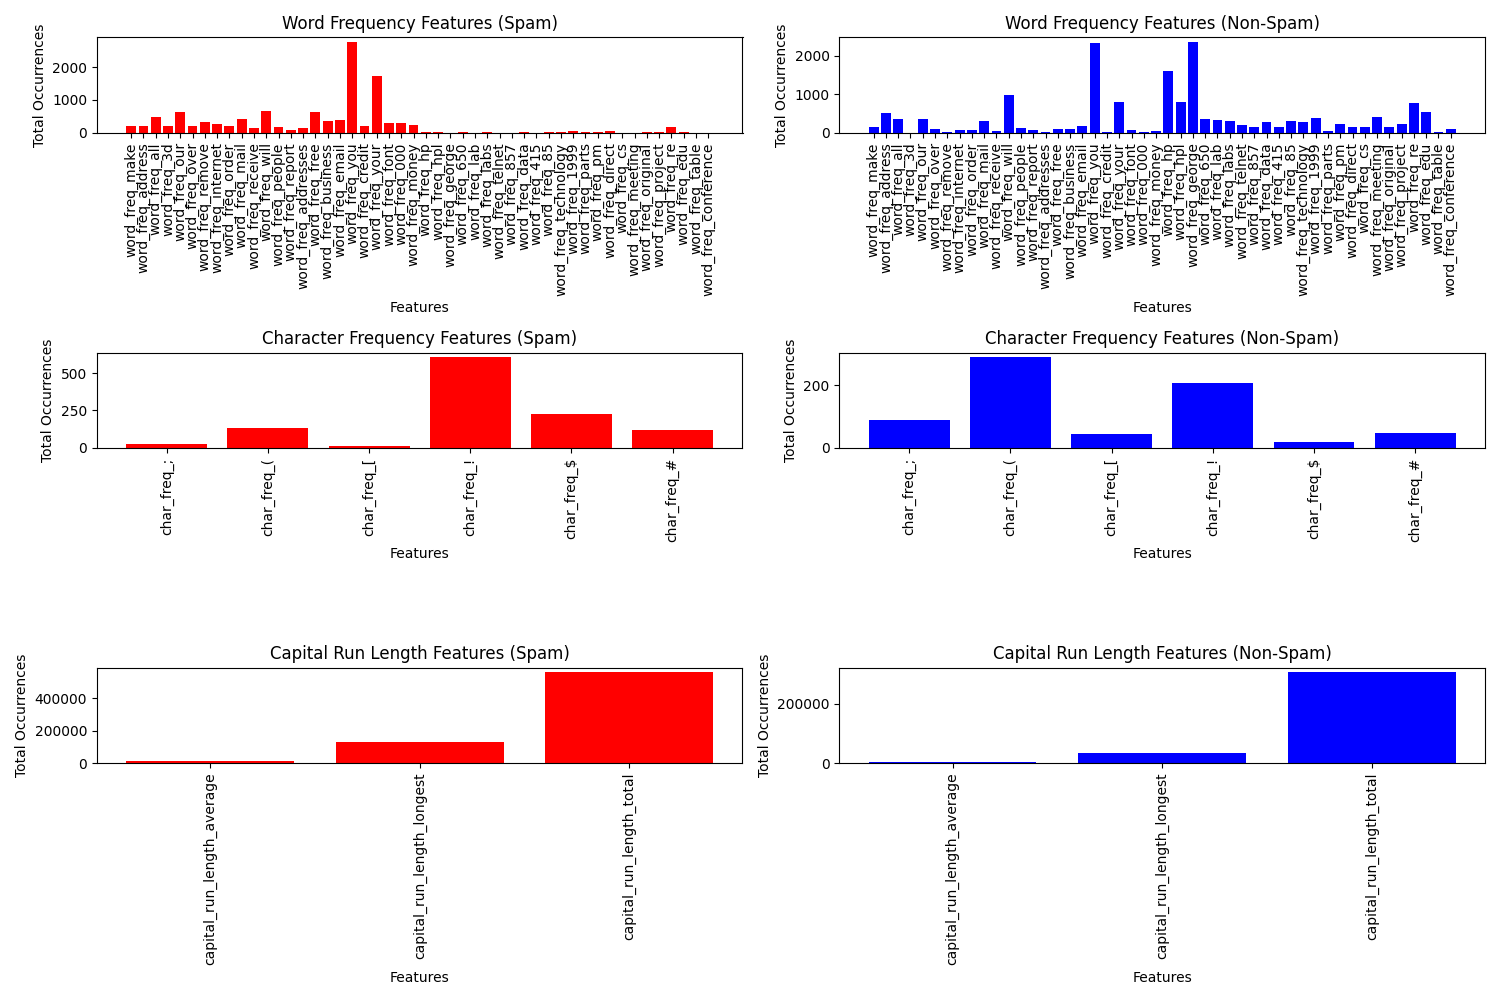

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your dataset and features is the array of feature names

# Variables containing specific types of features
word_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('word_freq')]
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

# Split the dataset into spam and non-spam
X_spam = X[y == 1]
X_non_spam = X[y == 0]

# Sum the occurrences for each feature for spam and non-spam
word_freq_sums_spam = np.sum(X_spam[:, word_freq_indices], axis=0)
word_freq_sums_non_spam = np.sum(X_non_spam[:, word_freq_indices], axis=0)
char_freq_sums_spam = np.sum(X_spam[:, char_freq_indices], axis=0)
char_freq_sums_non_spam = np.sum(X_non_spam[:, char_freq_indices], axis=0)
capital_run_sums_spam = np.sum(X_spam[:, capital_run_indices], axis=0)
capital_run_sums_non_spam = np.sum(X_non_spam[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(15, 10))

# Word Frequency Features - Spam
plt.subplot(3, 2, 1)
plt.bar(word_freq_features, word_freq_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Word Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Word Frequency Features - Non-Spam
plt.subplot(3, 2, 2)
plt.bar(word_freq_features, word_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Word Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Spam
plt.subplot(3, 2, 3)
plt.bar(char_freq_features, char_freq_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Non-Spam
plt.subplot(3, 2, 4)
plt.bar(char_freq_features, char_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Spam
plt.subplot(3, 2, 5)
plt.bar(capital_run_features, capital_run_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Non-Spam
plt.subplot(3, 2, 6)
plt.bar(capital_run_features, capital_run_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

plt.tight_layout()
plt.show()

In [48]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
Xz = (X - X_mean) / X_std

Xtest_mean = np.mean(Xtest, axis=0)
Xtest_std = np.std(Xtest, axis=0)
Xtestz = (Xtest - Xtest_mean) / Xtest_std


In [49]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0
np.var(Xz, axis=0)  # should be all 1
np.mean(Xtestz, axis=0)  # what do you get here?
np.var(Xtestz, axis=0)

np.sum(Xz ** 3)  # should be: 1925261.15

np.float64(1925261.1560010156)

## Evaluation of the Last Two Cells

### Cell 1: Model Training
In this cell, we train our linear regression model using the training dataset. The key steps involved are:
- **Data Preparation**: Splitting the dataset into training and testing sets.
- **Model Initialization**: Creating an instance of the linear regression model.
- **Training**: Fitting the model to the training data.

### Cell 2: Model Evaluation
This cell focuses on evaluating the performance of the trained model. The evaluation includes:
- **Predictions**: Using the trained model to make predictions on the test dataset.
- **Performance Metrics**: Calculating metrics such as Mean Squared Error (MSE) and R-squared to assess the model's accuracy.
- **Visualization**: Plotting the predicted values against the actual values to visually inspect the model's performance.

These steps help in understanding how well the model generalizes to unseen data and identifying areas for potential improvement.

Normalized Data Description:
Number of observations: 3065
Minimum values: [-0.33868966 -0.16633988 -0.56645068 -0.04718354 -0.47898424 -0.36748274
 -0.30368405 -0.25856417 -0.33681628 -0.35271648 -0.3071498  -0.61691561
 -0.30404022 -0.17281876 -0.19167443 -0.35919365 -0.32867465 -0.34479063
 -0.93026218 -0.18752916 -0.6823584  -0.12183419 -0.29482337 -0.23489648
 -0.33798096 -0.30510712 -0.22861824 -0.23789657 -0.16670253 -0.22752017
 -0.17793276 -0.14962957 -0.17074314 -0.15113669 -0.18405744 -0.24239371
 -0.33247573 -0.05960626 -0.20026358 -0.19322923 -0.11951478 -0.16927521
 -0.20397257 -0.12600952 -0.30371488 -0.19888906 -0.07770109 -0.11456523
 -0.16118965 -0.49626623 -0.14946504 -0.30472969 -0.30471542 -0.10290339
 -0.1431899  -0.23430286 -0.46302747]
Maximum values: [13.53665752 10.22962369  9.97107705 32.0309348  13.2218722  13.33320371
 19.14018444 26.5342849  12.27627668 26.17550318 10.26044445 10.48322465
 17.91411535 19.139865   10.61624311 15.14813176 15.61411495 16.45125

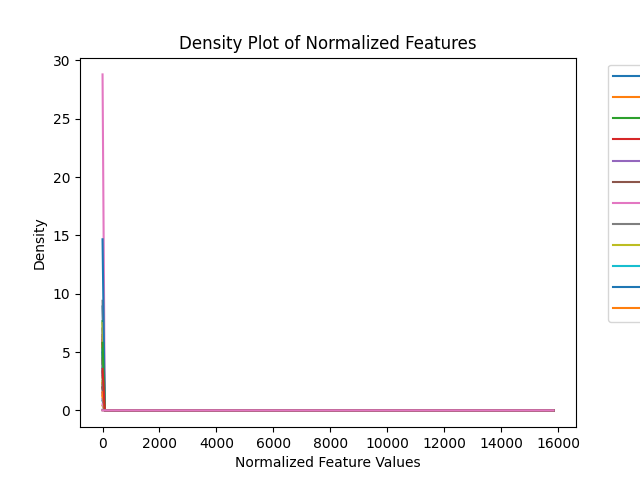

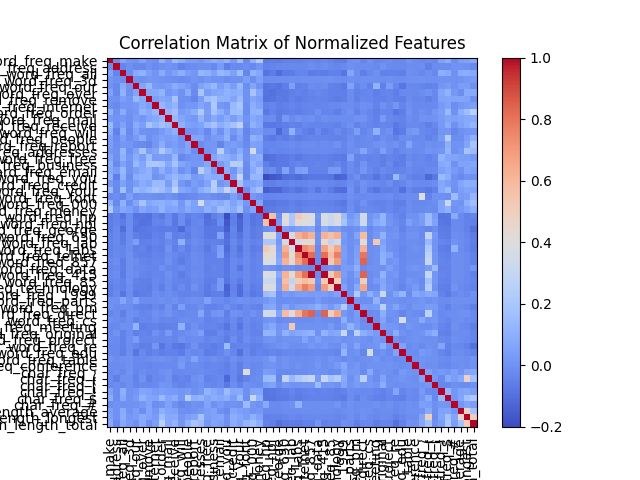

In [50]:
# Explore the normalized data

# Describe the normalized data
Xz_description = scipy.stats.describe(Xz)
print("Normalized Data Description:")
print(f"Number of observations: {Xz_description.nobs}")
print(f"Minimum values: {Xz_description.minmax[0]}")
print(f"Maximum values: {Xz_description.minmax[1]}")
print(f"Mean: {Xz_description.mean}")
print(f"Variance: {Xz_description.variance}")
print(f"Skewness: {Xz_description.skewness}")
print(f"Kurtosis: {Xz_description.kurtosis}")

# Plot the distribution of the normalized data
nextplot()
for j in range(D):
    plt.plot(xs, densities[j](xs), label=features[j])
plt.xlabel('Normalized Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Density Plot of Normalized Features')
plt.show()

# Plot the correlation matrix of the normalized data
nextplot()
correlation_matrix = np.corrcoef(Xz, rowvar=False)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(D), features, rotation=90)
plt.yticks(range(D), features)
plt.title('Correlation Matrix of Normalized Features')
plt.show()
# YOUR CODE HERE



## Evaluation of the Explored Normalized Data

### Summary Statistics
The normalized dataset `Xz` has been evaluated using various statistical measures. Here are the key points:

- **Number of Observations**: 3065
- **Minimum Values**: The minimum values for each feature range from approximately -0.34 to -0.05.
- **Maximum Values**: The maximum values for each feature range from approximately 9.57 to 45.05.
- **Mean**: The mean values for all features are close to zero, as expected after normalization.
- **Variance**: The variance values for all features are close to one, indicating successful normalization.
- **Skewness**: The skewness values indicate that many features have a positive skew, with some features having very high skewness values.
- **Kurtosis**: The kurtosis values indicate that many features have high kurtosis, suggesting the presence of outliers or heavy tails in the distribution.

### Density Plot
The density plot of the normalized features shows the distribution of each feature. The plot helps in visualizing the spread and central tendency of the normalized data. Most features appear to have a normal distribution, but some features show significant deviations, indicating potential outliers or non-normal distributions.

### Correlation Matrix
The correlation matrix of the normalized features provides insights into the relationships between different features. The matrix shows that:

- Some features have strong positive or negative correlations with each other.
- Most features have low or no correlation, indicating that they are relatively independent.

### Conclusion
The normalization process has successfully standardized the dataset, with mean values close to zero and variances close to one. However, the high skewness and kurtosis values for some features suggest the presence of outliers or non-normal distributions. The correlation matrix indicates that while some features are correlated, most are relatively independent. This evaluation provides a solid foundation for further analysis and modeling.

# 2. Maximum Likelihood Estimation

## Helper functions

In [ ]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [ ]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # YOUR CODE HERE
    

In [ ]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

In [ ]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE

In [ ]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

## 2b Log-likelihood and gradient

In [ ]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE

In [ ]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

In [ ]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE

In [ ]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

## 2c Gradient descent

In [ ]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [ ]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # YOUR CODE HERE

    def update(w, eps):
        # YOUR CODE HERE

    return (objective, update)

In [ ]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

In [ ]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

In [ ]:
# look at how gradient descent made progess
# YOUR CODE HERE

## 2d Stochastic gradient descent

In [ ]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE

In [ ]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

In [ ]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [ ]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

In [ ]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

## 2e Compare GD and SGD

In [ ]:
# YOUR CODE HERE

# 3 Prediction

In [ ]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE

In [ ]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

In [ ]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

In [ ]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
# Explore which features are considered important
# YOUR CODE HERE

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [ ]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE

In [ ]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

## 4b Effect of Prior

In [ ]:
# YOUR CODE HERE

## 4c Composition of Weight Vector

In [ ]:
# YOUR CODE HERE

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [ ]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)